In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/kaggle/input/vehicle-price-prediction-dataset/Vehicle Price.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

In [4]:
df.head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [5]:
df['description'][0]

'\n      \n        Heated Leather Seats, Nav System, Moonroof, Third Row Seat, 4x4, Turbo Charged Engine, Hitch, ENGINE: 3.0L I6 HURRICANE SO TWIN TUR... Quad Bucket Seats. Series II Carbide trim, Bright White Clearcoat exterior and Global Black interior KEY FEATURES INCLUDELeather Seats, Navigation, 4x4, Power Liftgate, Rear Air OPTION PACKAGESQUICK ORDER PACKAGE 25F CARBIDE Engine: 3.0L I6 Hurricane SO Twin Turbo ESS, Transmission: 8-Speed Automatic (8HP75), Reversible Carpet/Vinyl Cargo Mat, Cargo Cover, Black Interior Accents, Carbide Appearance Package, 3 Panel Sunroof, Adjustable Roof Rail Crossbars, Piano Black Exterior Accents, HD TRAILER TOW PACKAGE Trailer Brake Control, Heavy Duty Engine Cooling, Electronic Rear Limited Slip Differential, Black Tow Hooks, Removable Rear Tow Hook, Trailer Hitch Zoom, 2 Speed On Demand Transfer Case, Wheels: 22 x 9.0 Painted Gloss Black, 3.92 Rear Axle Ratio, Selec-Speed Control, FLEXIBLE SEATING GROUP 60/40 Power Recline 3rd Row Seat, Power T

In [6]:
import pandas as pd

# Fill NaNs and lowercase the text
df['description'] = df['description'].fillna('').str.lower()

# List of features that are not in existing structured columns
keywords = [
    'leather seats', 'heated seats', 'cooled seats', 'moonroof', 'sunroof',
    'navigation', 'remote start', 'blind spot', 'tow package', 'backup camera',
    'third row', 'adaptive cruise', 'parking sensors', 'bluetooth',
    'apple carplay', 'android auto', 'power liftgate', 'premium sound'
]

# Extract binary presence flags
for kw in keywords:
    col_name = f"has_{kw.replace(' ', '_')}"
    df[col_name] = df['description'].str.contains(kw).astype(int)


In [7]:
df

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,...,has_tow_package,has_backup_camera,has_third_row,has_adaptive_cruise,has_parking_sensors,has_bluetooth,has_apple_carplay,has_android_auto,has_power_liftgate,has_premium_sound
0,2024 Jeep Wagoneer Series II,"\n \n heated leather seats, nav sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,...,1,0,1,0,0,0,0,0,1,0
1,2024 Jeep Grand Cherokee Laredo,al west is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,...,0,0,0,0,0,0,0,0,0,0
2,2024 GMC Yukon XL Denali,,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2023 Dodge Durango Pursuit,white knuckle clearcoat 2023 dodge durango pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,...,0,0,0,0,0,0,0,0,0,0
4,2024 RAM 3500 Laramie,\n \n 2024 ram 3500 laramie billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,...,0,0,0,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,2024 Mercedes-Benz Sprinter 2500 Standard Roof,2024 mercedes-benz sprinter 2500 cargo 144 wb ...,Mercedes-Benz,Sprinter 2500,2024,59037.0,16V DDI DOHC Turbo Diesel,4.0,Diesel,10.0,...,0,0,0,0,0,0,0,0,0,0
998,2024 Dodge Hornet Hornet R/T Plus Eawd,dealer comments +++ price ends 5/31/2024 +++ a...,Dodge,Hornet,2024,49720.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,0.0,...,0,0,0,0,0,0,0,0,0,0
999,2024 Jeep Wagoneer Base,\n \n the all new friendship cdjr ...,Jeep,Wagoneer,2024,69085.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,20.0,...,0,0,0,0,0,0,0,0,0,0
1000,2024 Nissan Murano SV Intelligent AWD,"\n \n cvt with xtronic, awd.at tod...",Nissan,Murano,2024,43495.0,"6 DOHC, variable valve control, regular unlead...",6.0,Gasoline,6.0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
import matplotlib.pyplot as plt

# See how each feature affects average price
for kw in keywords:
    col_name = f"has_{kw.replace(' ', '_')}"
    if df[col_name].sum() > 0:
        avg_price_with = df[df[col_name] == 1]['price'].mean()
        avg_price_without = df[df[col_name] == 0]['price'].mean()
        diff = avg_price_with - avg_price_without
        print(f"{kw.title():<25}: +₹{diff:,.0f} average difference")


Leather Seats            : +₹20,022 average difference
Heated Seats             : +₹-693 average difference
Cooled Seats             : +₹11,492 average difference
Moonroof                 : +₹7,631 average difference
Sunroof                  : +₹10,977 average difference
Navigation               : +₹11,681 average difference
Remote Start             : +₹-4,823 average difference
Blind Spot               : +₹-2,724 average difference
Tow Package              : +₹13,447 average difference
Backup Camera            : +₹-5,011 average difference
Third Row                : +₹25,627 average difference
Adaptive Cruise          : +₹6,211 average difference
Parking Sensors          : +₹-11,603 average difference
Bluetooth                : +₹-385 average difference
Apple Carplay            : +₹-6,835 average difference
Android Auto             : +₹-7,085 average difference
Power Liftgate           : +₹4,262 average difference
Premium Sound            : +₹9,589 average difference


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 1002 non-null   object 
 1   description          1002 non-null   object 
 2   make                 1002 non-null   object 
 3   model                1002 non-null   object 
 4   year                 1002 non-null   int64  
 5   price                979 non-null    float64
 6   engine               1000 non-null   object 
 7   cylinders            897 non-null    float64
 8   fuel                 995 non-null    object 
 9   mileage              968 non-null    float64
 10  transmission         1000 non-null   object 
 11  trim                 1001 non-null   object 
 12  body                 999 non-null    object 
 13  doors                995 non-null    float64
 14  exterior_color       997 non-null    object 
 15  interior_color       964 non-null    o

In [10]:
df=df.drop('description',axis=1)

In [11]:
df

,name,make,model,year,price,engine,cylinders,fuel,mileage,transmission,...,has_tow_package,has_backup_camera,has_third_row,has_adaptive_cruise,has_parking_sensors,has_bluetooth,has_apple_carplay,has_android_auto,has_power_liftgate,has_premium_sound
0,2024 Jeep Wagoneer Series II,Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,...,1,0,1,0,0,0,0,0,1,0
1,2024 Jeep Grand Cherokee Laredo,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,...,0,0,0,0,0,0,0,0,0,0
2,2024 GMC Yukon XL Denali,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,...,0,0,0,0,0,0,0,0,0,0
3,2023 Dodge Durango Pursuit,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,...,0,0,0,0,0,0,0,0,0,0
4,2024 RAM 3500 Laramie,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,...,0,0,0,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,2024 Mercedes-Benz Sprinter 2500 Standard Roof,Mercedes-Benz,Sprinter 2500,2024,59037.0,16V DDI DOHC Turbo Diesel,4.0,Diesel,10.0,9-Speed Automatic,...,0,0,0,0,0,0,0,0,0,0
998,2024 Dodge Hornet Hornet R/T Plus Eawd,Dodge,Hornet,2024,49720.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,0.0,6-Spd Aisin F21-250 PHEV Auto Trans,...,0,0,0,0,0,0,0,0,0,0
999,2024 Jeep Wagoneer Base,Jeep,Wagoneer,2024,69085.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,20.0,8-Speed Automatic,...,0,0,0,0,0,0,0,0,0,0
1000,2024 Nissan Murano SV Intelligent AWD,Nissan,Murano,2024,43495.0,"6 DOHC, variable valve control, regular unlead...",6.0,Gasoline,6.0,Automatic,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df['transmission'].value_counts()

transmission
8-Speed Automatic                              325
Automatic                                      236
6-Speed Automatic                               98
1-Speed Automatic                               69
9-Speed Automatic                               62
10-Speed Automatic                              58
Automatic CVT                                   45
8-Speed Automatic with Auto-Shift               17
7-Speed DSGA? Automatic w/ 4MO                  11
8-Speed Automatic with Tiptronic                10
CVT                                              9
6-Spd Aisin F21-250 PHEV Auto Trans              7
8-speed automatic                                5
8-Speed A/T                                      4
7-Speed Automatic with Auto-Shift                4
6-Speed Automatic Electronic with Overdrive      4
9-Speed 948TE Automatic                          4
7-Speed Automatic S tronic                       4
7-Speed DSG Automatic with Tiptronic             4
Variable          

In [13]:
def transmission1(trans):
    trans = str(trans).lower()
    if 'auto' in trans or 'a/t' in trans:
        return 'Automatic'
    elif 'manual' in trans:
        return 'Manual'
    elif 'cvt' in trans:
        return 'CVT'
    else:
        return 'Other'


In [14]:
transmission1(df['transmission'][4])

'Automatic'

In [15]:
transmission=[]


In [16]:
for i in df['transmission']:
    transmission.append(transmission1(i))

In [17]:
df['transmission'].count()

1000

In [18]:
len(transmission)

1002

In [19]:
df['transmission_extract']=transmission

In [20]:
df['transmission_extract'].value_counts()

transmission_extract
Automatic    982
CVT           13
Other          7
Name: count, dtype: int64

In [21]:
df=df.drop('transmission',axis=1)

In [22]:
df['price']=df['price'].fillna(df.groupby('transmission_extract')['price'].transform('median'))

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  1002 non-null   object 
 1   make                  1002 non-null   object 
 2   model                 1002 non-null   object 
 3   year                  1002 non-null   int64  
 4   price                 1002 non-null   float64
 5   engine                1000 non-null   object 
 6   cylinders             897 non-null    float64
 7   fuel                  995 non-null    object 
 8   mileage               968 non-null    float64
 9   trim                  1001 non-null   object 
 10  body                  999 non-null    object 
 11  doors                 995 non-null    float64
 12  exterior_color        997 non-null    object 
 13  interior_color        964 non-null    object 
 14  drivetrain            1002 non-null   object 
 15  has_leather_seats    

In [24]:
df[df['cylinders'].isnull()]['fuel'].value_counts()

fuel
Electric    97
Gasoline     1
Name: count, dtype: int64

In [25]:
df.groupby('fuel')['cylinders'].median()

fuel
Diesel                  6.0
Diesel (B20 capable)    8.0
E85 Flex Fuel           6.0
Electric                0.0
Gasoline                4.0
Hybrid                  4.0
PHEV Hybrid Fuel        4.0
Name: cylinders, dtype: float64

In [26]:
df['cylinders']=df['cylinders'].fillna(df.groupby('fuel')['cylinders'].transform('median'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  1002 non-null   object 
 1   make                  1002 non-null   object 
 2   model                 1002 non-null   object 
 3   year                  1002 non-null   int64  
 4   price                 1002 non-null   float64
 5   engine                1000 non-null   object 
 6   cylinders             995 non-null    float64
 7   fuel                  995 non-null    object 
 8   mileage               968 non-null    float64
 9   trim                  1001 non-null   object 
 10  body                  999 non-null    object 
 11  doors                 995 non-null    float64
 12  exterior_color        997 non-null    object 
 13  interior_color        964 non-null    object 
 14  drivetrain            1002 non-null   object 
 15  has_leather_seats    

In [27]:
df['fuel']=df['fuel'].fillna('Electric')

In [28]:
df.iloc[315]

name                    2024 Honda Prologue TOURING
make                                          Honda
model                                      Prologue
year                                           2024
price                                       56550.0
engine                                            c
cylinders                                       NaN
fuel                                       Electric
mileage                                         1.0
trim                                        TOURING
body                                            SUV
doors                                           4.0
exterior_color                                 Gray
interior_color                                Black
drivetrain                          All-wheel Drive
has_leather_seats                                 0
has_heated_seats                                  0
has_cooled_seats                                  0
has_moonroof                                      0
has_sunroof 

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  1002 non-null   object 
 1   make                  1002 non-null   object 
 2   model                 1002 non-null   object 
 3   year                  1002 non-null   int64  
 4   price                 1002 non-null   float64
 5   engine                1000 non-null   object 
 6   cylinders             995 non-null    float64
 7   fuel                  1002 non-null   object 
 8   mileage               968 non-null    float64
 9   trim                  1001 non-null   object 
 10  body                  999 non-null    object 
 11  doors                 995 non-null    float64
 12  exterior_color        997 non-null    object 
 13  interior_color        964 non-null    object 
 14  drivetrain            1002 non-null   object 
 15  has_leather_seats    

In [30]:
df['cylinders']=df['cylinders'].fillna(0)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  1002 non-null   object 
 1   make                  1002 non-null   object 
 2   model                 1002 non-null   object 
 3   year                  1002 non-null   int64  
 4   price                 1002 non-null   float64
 5   engine                1000 non-null   object 
 6   cylinders             1002 non-null   float64
 7   fuel                  1002 non-null   object 
 8   mileage               968 non-null    float64
 9   trim                  1001 non-null   object 
 10  body                  999 non-null    object 
 11  doors                 995 non-null    float64
 12  exterior_color        997 non-null    object 
 13  interior_color        964 non-null    object 
 14  drivetrain            1002 non-null   object 
 15  has_leather_seats    

In [32]:
df[df['mileage'].isnull()]['fuel'].value_counts()

fuel
Gasoline    25
Hybrid       6
Electric     3
Name: count, dtype: int64

In [33]:
df[df['mileage'].isnull()]['cylinders'].value_counts()

cylinders
4.0    18
6.0    11
0.0     3
3.0     2
Name: count, dtype: int64

In [34]:
df.groupby(['fuel', 'cylinders'])['mileage'].median()




fuel                  cylinders
Diesel                4.0          10.0
                      6.0          11.0
                      8.0           3.0
Diesel (B20 capable)  8.0           9.0
E85 Flex Fuel         6.0          10.0
Electric              0.0           8.0
Gasoline              3.0           5.0
                      4.0           7.0
                      6.0           8.0
                      8.0          11.5
Hybrid                4.0          10.0
                      6.0          10.0
PHEV Hybrid Fuel      4.0           6.0
Name: mileage, dtype: float64

In [35]:
# Group by fuel and cylinders to compute median mileage
group_medians = df.groupby(['fuel', 'cylinders'])['mileage'].median()

#Define a function to apply this group-based fill
def fill_mileage(row):
    if pd.isnull(row['mileage']):
        key = (row['fuel'], row['cylinders'])
        return group_medians.get(key, np.nan)  # fallback to NaN if combo not found
    return row['mileage']

#Apply it
df['mileage'] = df.apply(fill_mileage, axis=1)


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  1002 non-null   object 
 1   make                  1002 non-null   object 
 2   model                 1002 non-null   object 
 3   year                  1002 non-null   int64  
 4   price                 1002 non-null   float64
 5   engine                1000 non-null   object 
 6   cylinders             1002 non-null   float64
 7   fuel                  1002 non-null   object 
 8   mileage               1002 non-null   float64
 9   trim                  1001 non-null   object 
 10  body                  999 non-null    object 
 11  doors                 995 non-null    float64
 12  exterior_color        997 non-null    object 
 13  interior_color        964 non-null    object 
 14  drivetrain            1002 non-null   object 
 15  has_leather_seats    

In [37]:
df[df['trim'].isnull()]

,name,make,model,year,price,engine,cylinders,fuel,mileage,trim,...,has_backup_camera,has_third_row,has_adaptive_cruise,has_parking_sensors,has_bluetooth,has_apple_carplay,has_android_auto,has_power_liftgate,has_premium_sound,transmission_extract
805,2023 Ford Transit-350,Ford,Transit-350,2023,54525.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,0.0,NaN,...,0,0,0,0,0,0,0,0,0,Automatic


In [38]:
df=df.drop(805,axis=0)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1001 entries, 0 to 1001
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  1001 non-null   object 
 1   make                  1001 non-null   object 
 2   model                 1001 non-null   object 
 3   year                  1001 non-null   int64  
 4   price                 1001 non-null   float64
 5   engine                999 non-null    object 
 6   cylinders             1001 non-null   float64
 7   fuel                  1001 non-null   object 
 8   mileage               1001 non-null   float64
 9   trim                  1001 non-null   object 
 10  body                  998 non-null    object 
 11  doors                 994 non-null    float64
 12  exterior_color        996 non-null    object 
 13  interior_color        963 non-null    object 
 14  drivetrain            1001 non-null   object 
 15  has_leather_seats     1001

In [40]:
df[df['body'].isnull()]

,name,make,model,year,price,engine,cylinders,fuel,mileage,trim,...,has_backup_camera,has_third_row,has_adaptive_cruise,has_parking_sensors,has_bluetooth,has_apple_carplay,has_android_auto,has_power_liftgate,has_premium_sound,transmission_extract
164,2024 Dodge Hornet R/T EAWD,Dodge,Hornet,2024,41497.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,11.0,R/T EAWD,...,0,0,0,0,0,0,0,0,0,Automatic
235,2024 Dodge Hornet R/T EAWD,Dodge,Hornet,2024,41036.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,5.0,R/T EAWD,...,0,0,0,0,0,0,0,0,0,Automatic
687,2024 INFINITI QX50 SPORT,INFINITI,QX50,2024,49404.0,ER,4.0,Gasoline,7.0,SPORT,...,0,0,0,0,0,0,0,1,0,CVT


In [41]:

common_bodies = df.groupby('make')['body'].agg(lambda x: x.mode().iloc[0])


In [42]:
common_bodies

make
Acura                      SUV
Audi                       SUV
BMW                      Sedan
Buick                      SUV
Cadillac                   SUV
Chevrolet         Pickup Truck
Chrysler         Passenger Van
Dodge                      SUV
Ford                       SUV
GMC                        SUV
Genesis                    SUV
Honda                      SUV
Hyundai                    SUV
INFINITI                   SUV
Jaguar                     SUV
Jeep                       SUV
Kia                        SUV
Land Rover                 SUV
Lexus                      SUV
Lincoln                    SUV
Mazda                      SUV
Mercedes-Benz              SUV
Nissan                     SUV
RAM               Pickup Truck
Subaru                     SUV
Toyota            Pickup Truck
Volkswagen                 SUV
Volvo                      SUV
Name: body, dtype: object

In [43]:
def fill_body(row):
    if pd.isnull(row['body']):
        return common_bodies.get(row['make'], np.nan)
    return row['body']


In [44]:
df['body'] = df.apply(fill_body, axis=1)


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1001 entries, 0 to 1001
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  1001 non-null   object 
 1   make                  1001 non-null   object 
 2   model                 1001 non-null   object 
 3   year                  1001 non-null   int64  
 4   price                 1001 non-null   float64
 5   engine                999 non-null    object 
 6   cylinders             1001 non-null   float64
 7   fuel                  1001 non-null   object 
 8   mileage               1001 non-null   float64
 9   trim                  1001 non-null   object 
 10  body                  1001 non-null   object 
 11  doors                 994 non-null    float64
 12  exterior_color        996 non-null    object 
 13  interior_color        963 non-null    object 
 14  drivetrain            1001 non-null   object 
 15  has_leather_seats     1001

In [46]:
df[df['interior_color'].isnull()]['make'].value_counts()

make
Acura            12
Kia               7
Jeep              4
Ford              4
Mercedes-Benz     4
GMC               3
Volkswagen        2
Honda             1
Dodge             1
Name: count, dtype: int64

In [47]:
df.groupby('make')['interior_color'].agg(lambda x: x.mode())

make
Acura                             []
Audi                           Black
BMW                            Black
Buick                          Ebony
Cadillac                   Jet Black
Chevrolet                  Jet Black
Chrysler                       Black
Dodge                          Black
Ford                           Ebony
GMC                        Jet Black
Genesis                        Black
Honda                          Black
Hyundai                        Black
INFINITI                 Pebble Gray
Jaguar                         Ebony
Jeep                           Black
Kia                            Black
Land Rover             [Ebony, Gray]
Lexus                          Black
Lincoln          [Black Onyx, Ebony]
Mazda                          Black
Mercedes-Benz                  Black
Nissan                      Charcoal
RAM                            Black
Subaru                         Black
Toyota                         Black
Volkswagen                     Bl

In [48]:
df['interior_color'].value_counts()

interior_color
Black           510
Global Black     84
Gray             77
Jet Black        45
Ebony            43
               ... 
Brown/Blk         1
Gray / Black      1
Oyster            1
Tupelo/Black      1
Navy Pier         1
Name: count, Length: 91, dtype: int64

In [49]:
df.groupby(['make', 'model'])['interior_color'].agg(lambda x: x.mode())


make        model                       
Acura       MDX                                      []
            ZDX                                      []
Audi        A3                                    Black
            A5 Sportback                          Black
            Q5 e                                  Black
                                               ...     
Volkswagen  Jetta                           Titan Black
            Taos                                  Black
Volvo       C40 Recharge Pure Electric         Charcoal
            S60 Recharge Plug-In Hybrid        Charcoal
            XC90 Recharge Plug-In Hybrid       Charcoal
Name: interior_color, Length: 153, dtype: object

In [50]:
df.groupby('exterior_color')['interior_color'].agg(lambda x: x.mode())


exterior_color
41w                                 Red
8 BALL                            Black
8 Ball                            Black
Abyss Black Pearl                 Black
Acapulco Gold                     Black
                               ...     
White Frost Tri-Coat       Alpine Umber
White Knuckle Clearcoat           Black
White Pearl                        Gray
Wolf Gray                         Black
Yacht Blue                        Black
Name: interior_color, Length: 263, dtype: object

In [51]:

grouped_colors = df.groupby(['make', 'model'])['interior_color'].agg(lambda x: x.mode())


overall_mode = df['interior_color'].mode().iloc[0]

def fill_interior(row):
    if pd.isnull(row['interior_color']):
        key = (row['make'], row['model'])
        return grouped_colors.get(key, overall_mode)
    return row['interior_color']

# Step 4: Apply
df['interior_color'] = df.apply(fill_interior, axis=1)


In [52]:
df['make']

0                Jeep
1                Jeep
2                 GMC
3               Dodge
4                 RAM
            ...      
997     Mercedes-Benz
998             Dodge
999              Jeep
1000           Nissan
1001        Chevrolet
Name: make, Length: 1001, dtype: object

In [53]:
acura=df[df['make']=='Acura']


In [54]:
acura

,name,make,model,year,price,engine,cylinders,fuel,mileage,trim,...,has_backup_camera,has_third_row,has_adaptive_cruise,has_parking_sensors,has_bluetooth,has_apple_carplay,has_android_auto,has_power_liftgate,has_premium_sound,transmission_extract
44,2024 Acura MDX Advance,Acura,MDX,2024,65595.0,24V GDI SOHC,6.0,Gasoline,16.0,Advance,...,0,0,0,0,0,0,0,0,0,Automatic
71,2024 Acura MDX Base,Acura,MDX,2024,51645.0,24V GDI SOHC,6.0,Gasoline,5.0,Base,...,0,0,0,0,0,0,0,0,0,Automatic
77,2024 Acura MDX Base,Acura,MDX,2024,51645.0,24V GDI SOHC,6.0,Gasoline,5.0,Base,...,0,0,0,0,0,0,0,0,0,Automatic
137,2024 Acura ZDX A-SPEC,Acura,ZDX,2024,69850.0,c,0.0,Electric,0.0,A-SPEC,...,0,0,0,0,0,0,0,0,0,Automatic
161,2024 Acura MDX Technology,Acura,MDX,2024,56155.0,24V GDI SOHC,6.0,Gasoline,3.0,Technology,...,0,0,0,0,0,0,0,0,0,Automatic
245,2024 Acura MDX Base,Acura,MDX,2024,52950.0,24V GDI SOHC,6.0,Gasoline,3.0,Base,...,0,0,0,0,0,0,0,0,0,Automatic
286,2024 Acura MDX Technology,Acura,MDX,2024,56345.0,24V GDI SOHC,6.0,Gasoline,5.0,Technology,...,0,0,0,0,0,0,0,0,0,Automatic
407,2024 Acura MDX Technology,Acura,MDX,2024,57650.0,24V GDI SOHC,6.0,Gasoline,5.0,Technology,...,0,0,0,0,0,0,0,0,0,Automatic
414,2024 Acura MDX Technology,Acura,MDX,2024,56800.0,24V GDI SOHC,6.0,Gasoline,5.0,Technology,...,0,0,0,0,0,0,0,0,0,Automatic
478,2024 Acura MDX Technology,Acura,MDX,2024,56800.0,24V GDI SOHC,6.0,Gasoline,5.0,Technology,...,0,0,0,0,0,0,0,0,0,Automatic


In [55]:
df

,name,make,model,year,price,engine,cylinders,fuel,mileage,trim,...,has_backup_camera,has_third_row,has_adaptive_cruise,has_parking_sensors,has_bluetooth,has_apple_carplay,has_android_auto,has_power_liftgate,has_premium_sound,transmission_extract
0,2024 Jeep Wagoneer Series II,Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,Series II,...,0,1,0,0,0,0,0,1,0,Automatic
1,2024 Jeep Grand Cherokee Laredo,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,Laredo,...,0,0,0,0,0,0,0,0,0,Automatic
2,2024 GMC Yukon XL Denali,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Denali,...,0,0,0,0,0,0,0,0,0,Automatic
3,2023 Dodge Durango Pursuit,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,Pursuit,...,0,0,0,0,0,0,0,0,0,Automatic
4,2024 RAM 3500 Laramie,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,Laramie,...,0,0,0,0,1,1,1,0,0,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,2024 Mercedes-Benz Sprinter 2500 Standard Roof,Mercedes-Benz,Sprinter 2500,2024,59037.0,16V DDI DOHC Turbo Diesel,4.0,Diesel,10.0,Standard Roof,...,0,0,0,0,0,0,0,0,0,Automatic
998,2024 Dodge Hornet Hornet R/T Plus Eawd,Dodge,Hornet,2024,49720.0,"4 gasoline direct injection, DOHC, Multiair va...",4.0,Gasoline,0.0,Hornet R/T Plus Eawd,...,0,0,0,0,0,0,0,0,0,Automatic
999,2024 Jeep Wagoneer Base,Jeep,Wagoneer,2024,69085.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,20.0,Base,...,0,0,0,0,0,0,0,0,0,Automatic
1000,2024 Nissan Murano SV Intelligent AWD,Nissan,Murano,2024,43495.0,"6 DOHC, variable valve control, regular unlead...",6.0,Gasoline,6.0,SV Intelligent AWD,...,0,0,0,0,0,0,0,0,0,Automatic


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1001 entries, 0 to 1001
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  1001 non-null   object 
 1   make                  1001 non-null   object 
 2   model                 1001 non-null   object 
 3   year                  1001 non-null   int64  
 4   price                 1001 non-null   float64
 5   engine                999 non-null    object 
 6   cylinders             1001 non-null   float64
 7   fuel                  1001 non-null   object 
 8   mileage               1001 non-null   float64
 9   trim                  1001 non-null   object 
 10  body                  1001 non-null   object 
 11  doors                 994 non-null    float64
 12  exterior_color        996 non-null    object 
 13  interior_color        1001 non-null   object 
 14  drivetrain            1001 non-null   object 
 15  has_leather_seats     1001

In [57]:
df[df['make'] == 'Acura']['interior_color'].value_counts(dropna=False)


interior_color
[]    11
[]     1
Name: count, dtype: int64

In [58]:
df[df['make']=='Acura']['interior_color']

44     []
71     []
77     []
137    []
161    []
245    []
286    []
407    []
414    []
478    []
675    []
812    []
Name: interior_color, dtype: object

In [59]:
df['interior_color'] = df['interior_color'].apply(
    lambda x: np.nan if isinstance(x, list) and len(x) == 0 else x
)


In [60]:
df[df['make']=='Acura']['interior_color']

44     []
71     []
77     []
137    []
161    []
245    []
286    []
407    []
414    []
478    []
675    []
812    []
Name: interior_color, dtype: object

In [61]:
import numpy as np

df['interior_color'] = df['interior_color'].apply(
    lambda x: np.nan if isinstance(x, list) and len(x) == 0 else x
)


In [62]:
df[df['exterior_color'].isnull()]['make'].value_counts()

make
Mercedes-Benz    3
Jeep             1
Acura            1
Name: count, dtype: int64

In [63]:
make_color_mode = df.groupby('make')['exterior_color'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

df['exterior_color'] = df['exterior_color'].fillna(df['make'].map(make_color_mode))


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1001 entries, 0 to 1001
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  1001 non-null   object 
 1   make                  1001 non-null   object 
 2   model                 1001 non-null   object 
 3   year                  1001 non-null   int64  
 4   price                 1001 non-null   float64
 5   engine                999 non-null    object 
 6   cylinders             1001 non-null   float64
 7   fuel                  1001 non-null   object 
 8   mileage               1001 non-null   float64
 9   trim                  1001 non-null   object 
 10  body                  1001 non-null   object 
 11  doors                 994 non-null    float64
 12  exterior_color        1001 non-null   object 
 13  interior_color        1001 non-null   object 
 14  drivetrain            1001 non-null   object 
 15  has_leather_seats     1001

In [65]:
df[df['engine'].isnull()]['make'].value_counts()

make
Honda    1
Jeep     1
Name: count, dtype: int64

In [66]:
df.groupby('make')['engine'].agg(lambda x:x.mode().iloc[0])

make
Acura                                                 24V GDI SOHC
Audi                                                             c
BMW                                                              c
Buick                                           12V GDI DOHC Turbo
Cadillac                                                         c
Chevrolet                                              16V GDI OHV
Chrysler                                             24V MPFI DOHC
Dodge                                                 16V MPFI OHV
Ford                                            16V GDI DOHC Turbo
GMC                                             16V GDI DOHC Turbo
Genesis                                                          c
Honda                                          16V GDI DOHC Hybrid
Hyundai                                                          c
INFINITI         o 2L I-4 port/direct injection, DOHC, variable...
Jaguar           d>\n\n    \n    <dt>VIN</dt>\n     SADHM

In [67]:
df['engine'].value_counts()

engine
16V GDI DOHC Turbo                                           130
c                                                             95
16V GDI DOHC Turbo Hybrid                                     94
24V MPFI DOHC                                                 56
16V MPFI OHV                                                  48
                                                            ... 
ne 3L I-6 gasoline direct injection, DOHC, variable valve      1
ream 2.5L I-4 port/direct injection, DOHC, CVVT variable       1
6 DOHC, VVT variable valve control, engine with cylinder       1
24V DOHC                                                       1
8 gasoline direct injection, variable valve control, regu      1
Name: count, Length: 100, dtype: int64

In [68]:
# Step 1: Function to extract engine features
import re
def extract_engine_features(text):

    if pd.isna(text):
        return pd.Series([np.nan, np.nan, np.nan, 0, 0])

    # 1. Extract number of valves (e.g., 16V)
    valve_match = re.search(r'(\d{2})V', text)
    valves = int(valve_match.group(1)) if valve_match else np.nan

    # 2. Extract camshaft type
    cam_match = re.search(r'\b(DOHC|SOHC|OHV)\b', text.upper())
    cam_type = cam_match.group(1) if cam_match else np.nan

    # 3. Extract fuel injection type
    inject_match = re.search(r'\b(GDI|MPFI|TDI|CVVT|VVT)\b', text.upper())
    fuel_inject = inject_match.group(1) if inject_match else np.nan

    # 4. Check for turbo
    is_turbo = int('turbo' in text.lower())

    # 5. Check for hybrid
    is_hybrid = int('hybrid' in text.lower())

    return pd.Series([valves, cam_type, fuel_inject, is_turbo, is_hybrid])

# Step 2: Apply function to your engine column
df[['valves', 'cam_type', 'fuel_inject', 'is_turbo', 'is_hybrid']] = df['engine'].apply(extract_engine_features)


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1001 entries, 0 to 1001
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  1001 non-null   object 
 1   make                  1001 non-null   object 
 2   model                 1001 non-null   object 
 3   year                  1001 non-null   int64  
 4   price                 1001 non-null   float64
 5   engine                999 non-null    object 
 6   cylinders             1001 non-null   float64
 7   fuel                  1001 non-null   object 
 8   mileage               1001 non-null   float64
 9   trim                  1001 non-null   object 
 10  body                  1001 non-null   object 
 11  doors                 994 non-null    float64
 12  exterior_color        1001 non-null   object 
 13  interior_color        1001 non-null   object 
 14  drivetrain            1001 non-null   object 
 15  has_leather_seats     1001

In [70]:

def extract_engine_features(text):
    if pd.isna(text):
        return pd.Series([np.nan, np.nan, np.nan, 0, 0])

    # 1. Number of valves (e.g., 16V, 24V)
    valve_match = re.search(r'(\d{2})V', text.upper())
    valves = int(valve_match.group(1)) if valve_match else np.nan

    # 2. Camshaft type (DOHC, SOHC, OHV)
    cam_match = re.search(r'\b(DOHC|SOHC|OHV)\b', text.upper())
    cam_type = cam_match.group(1) if cam_match else np.nan

    # 3. Fuel injection type (GDI, MPFI, TDI, etc.)
    inject_match = re.search(r'\b(GDI|MPFI|TDI|CVVT|VVT)\b', text.upper())
    fuel_inject = inject_match.group(1) if inject_match else np.nan

    # 4. Turbocharged?
    is_turbo = int('turbo' in text.lower())

    # 5. Hybrid?
    is_hybrid = int('hybrid' in text.lower())

    return pd.Series([valves, cam_type, fuel_inject, is_turbo, is_hybrid])


df[['valves', 'cam_type', 'fuel_inject', 'is_turbo', 'is_hybrid']] = df['engine'].apply(extract_engine_features)


valve_mode = df.groupby(['make', 'model'])['valves']\
               .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

df['valves'] = df.apply(
    lambda row: valve_mode.get((row['make'], row['model']), row['valves']) if pd.isna(row['valves']) else row['valves'],
    axis=1
)

# Fill remaining missing 'valves' with -1
df['valves'] = df['valves'].fillna(-1)

# --- Fill missing strings with 'Unknown' ---
df['cam_type'] = df['cam_type'].fillna('Unknown')
df['fuel_inject'] = df['fuel_inject'].fillna('Unknown')

# --- Ensure binary columns are integers ---
df['is_turbo'] = df['is_turbo'].astype(int)
df['is_hybrid'] = df['is_hybrid'].astype(int)

# --- Optional: Check ---
print(df[['engine', 'valves', 'cam_type', 'fuel_inject', 'is_turbo', 'is_hybrid']].sample(5))


                                                engine  valves cam_type  \
683                                 16V GDI DOHC Turbo    16.0     DOHC   
81   6.2L V-8 gasoline direct injection, variable v...    -1.0  Unknown   
564                                       16V MPFI OHV    16.0      OHV   
434                                      24V MPFI DOHC    24.0     DOHC   
76   4 port/direct injection, DOHC, CVVT variable v...    16.0     DOHC   

    fuel_inject  is_turbo  is_hybrid  
683         GDI         1          0  
81      Unknown         0          0  
564        MPFI         0          0  
434        MPFI         0          0  
76         CVVT         0          0  


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1001 entries, 0 to 1001
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  1001 non-null   object 
 1   make                  1001 non-null   object 
 2   model                 1001 non-null   object 
 3   year                  1001 non-null   int64  
 4   price                 1001 non-null   float64
 5   engine                999 non-null    object 
 6   cylinders             1001 non-null   float64
 7   fuel                  1001 non-null   object 
 8   mileage               1001 non-null   float64
 9   trim                  1001 non-null   object 
 10  body                  1001 non-null   object 
 11  doors                 994 non-null    float64
 12  exterior_color        1001 non-null   object 
 13  interior_color        1001 non-null   object 
 14  drivetrain            1001 non-null   object 
 15  has_leather_seats     1001

In [72]:
df['valves'].value_counts()

valves
 16.0    556
 24.0    259
-1.0     151
 12.0     28
 32.0      7
Name: count, dtype: int64

In [73]:
df['cam_type'].value_counts()

cam_type
DOHC       690
Unknown    174
OHV        121
SOHC        16
Name: count, dtype: int64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1001 entries, 0 to 1001
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  1001 non-null   object 
 1   make                  1001 non-null   object 
 2   model                 1001 non-null   object 
 3   year                  1001 non-null   int64  
 4   price                 1001 non-null   float64
 5   engine                999 non-null    object 
 6   cylinders             1001 non-null   float64
 7   fuel                  1001 non-null   object 
 8   mileage               1001 non-null   float64
 9   trim                  1001 non-null   object 
 10  body                  1001 non-null   object 
 11  doors                 994 non-null    float64
 12  exterior_color        1001 non-null   object 
 13  interior_color        1001 non-null   object 
 14  drivetrain            1001 non-null   object 
 15  has_leather_seats     1001

In [75]:
df=df.drop('engine',axis=1)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1001 entries, 0 to 1001
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  1001 non-null   object 
 1   make                  1001 non-null   object 
 2   model                 1001 non-null   object 
 3   year                  1001 non-null   int64  
 4   price                 1001 non-null   float64
 5   cylinders             1001 non-null   float64
 6   fuel                  1001 non-null   object 
 7   mileage               1001 non-null   float64
 8   trim                  1001 non-null   object 
 9   body                  1001 non-null   object 
 10  doors                 994 non-null    float64
 11  exterior_color        1001 non-null   object 
 12  interior_color        1001 non-null   object 
 13  drivetrain            1001 non-null   object 
 14  has_leather_seats     1001 non-null   int64  
 15  has_heated_seats      1001

In [77]:
df['doors'].value_counts()

doors
4.0    947
3.0     36
2.0     10
5.0      1
Name: count, dtype: int64

In [78]:
df[df['doors'].isnull()]['body'].value_counts()


body
SUV    7
Name: count, dtype: int64

In [79]:
df.groupby('body')['doors'].agg(lambda x:x.mode().iloc[0])

body
Cargo Van        3.0
Convertible      2.0
Hatchback        4.0
Minivan          4.0
Passenger Van    4.0
Pickup Truck     4.0
SUV              4.0
Sedan            4.0
Name: doors, dtype: float64

In [80]:
df['doors']=df['doors'].fillna(4.0)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1001 entries, 0 to 1001
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  1001 non-null   object 
 1   make                  1001 non-null   object 
 2   model                 1001 non-null   object 
 3   year                  1001 non-null   int64  
 4   price                 1001 non-null   float64
 5   cylinders             1001 non-null   float64
 6   fuel                  1001 non-null   object 
 7   mileage               1001 non-null   float64
 8   trim                  1001 non-null   object 
 9   body                  1001 non-null   object 
 10  doors                 1001 non-null   float64
 11  exterior_color        1001 non-null   object 
 12  interior_color        1001 non-null   object 
 13  drivetrain            1001 non-null   object 
 14  has_leather_seats     1001 non-null   int64  
 15  has_heated_seats      1001

In [82]:
df['cam_type'].value_counts()

cam_type
DOHC       690
Unknown    174
OHV        121
SOHC        16
Name: count, dtype: int64

In [83]:
df2=pd.concat([df,pd.get_dummies(df['cam_type'],dtype=int,drop_first=True)],axis=1)

In [84]:
df2=df2.drop('cam_type',axis=1)

In [85]:
df2=df2.drop('name',axis=1)

In [86]:
df2['make'].value_counts()

make
Jeep             194
Hyundai          121
Dodge            117
Ford              87
RAM               79
Kia               52
Chevrolet         49
Nissan            40
Volkswagen        38
Mazda             38
Mercedes-Benz     30
GMC               23
Honda             22
BMW               19
Audi              16
Acura             12
Chrysler          12
Cadillac          10
Subaru             8
Toyota             8
Buick              8
INFINITI           5
Land Rover         4
Volvo              3
Lincoln            2
Genesis            2
Lexus              1
Jaguar             1
Name: count, dtype: int64

In [87]:
from sklearn.model_selection import KFold

# Ensure index is reset for compatibility
df2 = df2.reset_index(drop=True)
df2['make_encoded'] = np.nan

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, val_idx in kf.split(df2):
    train_df2, val_df2 = df2.iloc[train_idx], df2.iloc[val_idx]

    # Compute mean price per make on the training fold
    make_means = train_df2.groupby('make')['price'].mean()

    # Get the actual row labels for .loc using df.index[val_idx]
    val_row_indices = df2.index[val_idx]

    # Assign encoded values to the correct rows
    df2.loc[val_row_indices, 'make_encoded'] = df2.loc[val_row_indices, 'make'].map(make_means)

# Fill rare or unseen makes with global average price
global_mean = df2['price'].mean()
df2['make_encoded'] = df2['make_encoded'].fillna(global_mean)


In [88]:
df2['make_encoded']

0       52073.993506
1       54173.796296
2       57895.833333
3       44357.021505
4       67339.245902
            ...     
996     81521.227273
997     44443.098901
998     53893.203947
999     32351.718750
1000    45569.157895
Name: make_encoded, Length: 1001, dtype: float64

In [89]:
df2=df2.drop('make',axis=1)


In [90]:
df2['model'].value_counts()

model
Hornet            65
3500              52
Compass           47
Durango           41
CX-90 PHEV        34
                  ..
SQ8 e-tron         1
Sorento Hybrid     1
Bronco             1
740                1
Forte              1
Name: count, Length: 153, dtype: int64

In [91]:


# Make sure the index is reset (prevents any index mismatch issues)
df2 = df2.reset_index(drop=True)
df2['model_encoded'] = np.nan

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, val_idx in kf.split(df2):
    train_df, val_df = df2.iloc[train_idx], df2.iloc[val_idx]
    
    # Compute average price per model from the training fold
    model_mean = train_df.groupby('model')['price'].mean()
    
    # Map to validation fold
    val_row_indices = df2.index[val_idx]
    df2.loc[val_row_indices, 'model_encoded'] = df2.loc[val_row_indices, 'model'].map(model_mean)

# Fill missing (unseen models during train fold) with global price mean
global_mean = df2['price'].mean()
df2['model_encoded'] = df2['model_encoded'].fillna(global_mean)


In [92]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   model                 1001 non-null   object 
 1   year                  1001 non-null   int64  
 2   price                 1001 non-null   float64
 3   cylinders             1001 non-null   float64
 4   fuel                  1001 non-null   object 
 5   mileage               1001 non-null   float64
 6   trim                  1001 non-null   object 
 7   body                  1001 non-null   object 
 8   doors                 1001 non-null   float64
 9   exterior_color        1001 non-null   object 
 10  interior_color        1001 non-null   object 
 11  drivetrain            1001 non-null   object 
 12  has_leather_seats     1001 non-null   int64  
 13  has_heated_seats      1001 non-null   int64  
 14  has_cooled_seats      1001 non-null   int64  
 15  has_moonroof         

In [93]:
df2=df2.drop('model',axis=1)

In [94]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  1001 non-null   int64  
 1   price                 1001 non-null   float64
 2   cylinders             1001 non-null   float64
 3   fuel                  1001 non-null   object 
 4   mileage               1001 non-null   float64
 5   trim                  1001 non-null   object 
 6   body                  1001 non-null   object 
 7   doors                 1001 non-null   float64
 8   exterior_color        1001 non-null   object 
 9   interior_color        1001 non-null   object 
 10  drivetrain            1001 non-null   object 
 11  has_leather_seats     1001 non-null   int64  
 12  has_heated_seats      1001 non-null   int64  
 13  has_cooled_seats      1001 non-null   int64  
 14  has_moonroof          1001 non-null   int64  
 15  has_sunroof          

In [95]:
df['fuel'].value_counts()

fuel
Gasoline                663
Hybrid                  137
Electric                106
Diesel                   73
PHEV Hybrid Fuel         16
E85 Flex Fuel             5
Diesel (B20 capable)      1
Name: count, dtype: int64

In [96]:

df2 = df2.reset_index(drop=True)
df2['fuel_encoded'] = np.nan

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, val_idx in kf.split(df2):
    train_df, val_df = df2.iloc[train_idx], df2.iloc[val_idx]

    # Mean price per fuel type from training fold
    fuel_mean = train_df.groupby('fuel')['price'].mean()

    # Map to validation fold only
    val_row_indices = df2.index[val_idx]
    df2.loc[val_row_indices, 'fuel_encoded'] = df2.loc[val_row_indices, 'fuel'].map(fuel_mean)

# Fill unseen fuel types with global mean
global_mean = df2['price'].mean()
df2['fuel_encoded'] = df2['fuel_encoded'].fillna(global_mean)


In [97]:
df2=df2.drop('fuel',axis=1)

In [98]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  1001 non-null   int64  
 1   price                 1001 non-null   float64
 2   cylinders             1001 non-null   float64
 3   mileage               1001 non-null   float64
 4   trim                  1001 non-null   object 
 5   body                  1001 non-null   object 
 6   doors                 1001 non-null   float64
 7   exterior_color        1001 non-null   object 
 8   interior_color        1001 non-null   object 
 9   drivetrain            1001 non-null   object 
 10  has_leather_seats     1001 non-null   int64  
 11  has_heated_seats      1001 non-null   int64  
 12  has_cooled_seats      1001 non-null   int64  
 13  has_moonroof          1001 non-null   int64  
 14  has_sunroof           1001 non-null   int64  
 15  has_navigation       

In [99]:
df['transmission_extract'].value_counts()

transmission_extract
Automatic    981
CVT           13
Other          7
Name: count, dtype: int64

In [100]:
trans_dummies = pd.get_dummies(df2['transmission_extract'], prefix='trans',dtype=int)
df2 = pd.concat([df2, trans_dummies], axis=1)


In [101]:
df2=df2.drop('transmission_extract',axis=1)

In [102]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 1001 non-null   int64  
 1   price                1001 non-null   float64
 2   cylinders            1001 non-null   float64
 3   mileage              1001 non-null   float64
 4   trim                 1001 non-null   object 
 5   body                 1001 non-null   object 
 6   doors                1001 non-null   float64
 7   exterior_color       1001 non-null   object 
 8   interior_color       1001 non-null   object 
 9   drivetrain           1001 non-null   object 
 10  has_leather_seats    1001 non-null   int64  
 11  has_heated_seats     1001 non-null   int64  
 12  has_cooled_seats     1001 non-null   int64  
 13  has_moonroof         1001 non-null   int64  
 14  has_sunroof          1001 non-null   int64  
 15  has_navigation       1001 non-null   i

In [103]:
inject_dummies = pd.get_dummies(df2['fuel_inject'], prefix='inject',dtype=int)
df2 = pd.concat([df2, inject_dummies], axis=1)


In [104]:
df2

,year,price,cylinders,mileage,trim,body,doors,exterior_color,interior_color,drivetrain,...,model_encoded,fuel_encoded,trans_Automatic,trans_CVT,trans_Other,inject_CVVT,inject_GDI,inject_MPFI,inject_Unknown,inject_VVT
0,2024,74600.0,6.0,10.0,Series II,SUV,4.0,White,Global Black,Four-wheel Drive,...,74898.500000,45052.688213,1,0,0,0,1,0,0,0
1,2024,50170.0,6.0,1.0,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive,...,47903.217391,46526.662432,1,0,0,0,0,0,1,0
2,2024,96410.0,8.0,0.0,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive,...,76648.000000,45052.688213,1,0,0,0,0,0,1,0
3,2023,46835.0,8.0,32.0,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive,...,47697.741935,45052.688213,1,0,0,0,0,1,0,0
4,2024,81663.0,6.0,10.0,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive,...,69621.333333,71366.660714,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,2024,59037.0,4.0,10.0,Standard Roof,Cargo Van,3.0,Arctic White,Black,Rear-wheel Drive,...,61690.000000,72328.275862,1,0,0,0,0,0,1,0
997,2024,49720.0,4.0,0.0,Hornet R/T Plus Eawd,SUV,4.0,Acapulco Gold,Black,All-wheel Drive,...,42210.770833,46526.662432,1,0,0,0,0,0,1,0
998,2024,69085.0,6.0,20.0,Base,SUV,4.0,Diamond Black,Black,Four-wheel Drive,...,74799.307692,46011.363462,1,0,0,0,1,0,0,0
999,2024,43495.0,6.0,6.0,SV Intelligent AWD,SUV,4.0,Pearl White Tricoat,Graphite,All-wheel Drive,...,46627.500000,46374.405660,1,0,0,0,0,0,1,0


In [105]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 1001 non-null   int64  
 1   price                1001 non-null   float64
 2   cylinders            1001 non-null   float64
 3   mileage              1001 non-null   float64
 4   trim                 1001 non-null   object 
 5   body                 1001 non-null   object 
 6   doors                1001 non-null   float64
 7   exterior_color       1001 non-null   object 
 8   interior_color       1001 non-null   object 
 9   drivetrain           1001 non-null   object 
 10  has_leather_seats    1001 non-null   int64  
 11  has_heated_seats     1001 non-null   int64  
 12  has_cooled_seats     1001 non-null   int64  
 13  has_moonroof         1001 non-null   int64  
 14  has_sunroof          1001 non-null   int64  
 15  has_navigation       1001 non-null   i

In [106]:
df2=df2.drop('fuel_inject',axis=1)

In [107]:
df2['exterior_color'].value_counts()

exterior_color
Bright White Clearcoat    82
Black                     32
White                     29
Gray                      28
Diamond Black             26
                          ..
Uyuni White                1
Artisan Red Metallic       1
Eiger Grey                 1
Alpine Gray                1
Wheatland Yellow           1
Name: count, Length: 263, dtype: int64

In [108]:
from sklearn.model_selection import KFold

df2 = df2.reset_index(drop=True)
df2['exterior_color_encoded'] = np.nan

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, val_idx in kf.split(df2):
    train_df, val_df = df2.iloc[train_idx], df2.iloc[val_idx]

    # Mean price per exterior color from training fold
    color_means = train_df.groupby('exterior_color')['price'].mean()

    val_row_indices = df2.index[val_idx]
    df2.loc[val_row_indices, 'exterior_color_encoded'] = df2.loc[val_row_indices, 'exterior_color'].map(color_means)

# Fill any missing values (rare/unseen colors) with global mean
global_mean = df2['price'].mean()
df2['exterior_color_encoded'] = df2['exterior_color_encoded'].fillna(global_mean)


In [109]:
df2=df2.drop('exterior_color',axis=1)

In [110]:
df['interior_color'].value_counts()

interior_color
Black            528
Global Black      85
Gray              77
Jet Black         45
Ebony             43
                ... 
Oyster             1
Tupelo/Black       1
Melange            1
Volcano Brown      1
Navy Pier          1
Name: count, Length: 95, dtype: int64

In [111]:
df2['interior_color'] = df2['interior_color'].apply(lambda x: str(x[0]) if isinstance(x, np.ndarray) and len(x) > 0 else (str(x) if not isinstance(x, np.ndarray) else 'Unknown'))


In [112]:
df2 = df2.reset_index(drop=True)
df2['interior_color_encoded'] = np.nan

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, val_idx in kf.split(df2):
    train_df, val_df = df2.iloc[train_idx], df2.iloc[val_idx]

    # Get average price per interior color from training data
    color_means = train_df.groupby('interior_color')['price'].mean()

    val_row_indices = df2.index[val_idx]
    df2.loc[val_row_indices, 'interior_color_encoded'] = df2.loc[val_row_indices, 'interior_color'].map(color_means)

# Fill unseen or NaN interior colors with global mean price
global_mean = df2['price'].mean()
df2['interior_color_encoded'] = df2['interior_color_encoded'].fillna(global_mean)


In [113]:
df2=df2.drop('interior_color',axis=1)

In [114]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    1001 non-null   int64  
 1   price                   1001 non-null   float64
 2   cylinders               1001 non-null   float64
 3   mileage                 1001 non-null   float64
 4   trim                    1001 non-null   object 
 5   body                    1001 non-null   object 
 6   doors                   1001 non-null   float64
 7   drivetrain              1001 non-null   object 
 8   has_leather_seats       1001 non-null   int64  
 9   has_heated_seats        1001 non-null   int64  
 10  has_cooled_seats        1001 non-null   int64  
 11  has_moonroof            1001 non-null   int64  
 12  has_sunroof             1001 non-null   int64  
 13  has_navigation          1001 non-null   int64  
 14  has_remote_start        1001 non-null   

In [115]:
df['trim'].value_counts()

trim
Limited                                      69
Base                                         56
Pursuit                                      35
SEL                                          33
Latitude                                     29
                                             ..
quattro                                       1
Premium 55 TFSI e S line quattro S tronic     1
FWD RS                                        1
Longhorn                                      1
SV Intelligent AWD                            1
Name: count, Length: 197, dtype: int64

In [116]:
from sklearn.model_selection import KFold

df2 = df2.reset_index(drop=True)
df2['trim_encoded'] = np.nan

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, val_idx in kf.split(df2):
    train_df, val_df = df2.iloc[train_idx], df2.iloc[val_idx]

    trim_mean = train_df.groupby('trim')['price'].mean()

    val_row_indices = df2.index[val_idx]
    df2.loc[val_row_indices, 'trim_encoded'] = df2.loc[val_row_indices, 'trim'].map(trim_mean)

# Fill missing/unseen trims with global average price
global_mean = df2['price'].mean()
df2['trim_encoded'] = df2['trim_encoded'].fillna(global_mean)


In [117]:
df2=df2.drop('trim',axis=1)

In [118]:
df['body'].value_counts()

body
SUV              707
Pickup Truck     154
Sedan             80
Cargo Van         35
Passenger Van     13
Hatchback         10
Convertible        1
Minivan            1
Name: count, dtype: int64

In [119]:


df2 = df2.reset_index(drop=True)
df2['body_encoded'] = np.nan

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, val_idx in kf.split(df2):
    train_df, val_df = df2.iloc[train_idx], df2.iloc[val_idx]

    body_mean = train_df.groupby('body')['price'].mean()
    val_row_indices = df2.index[val_idx]

    df2.loc[val_row_indices, 'body_encoded'] = df2.loc[val_row_indices, 'body'].map(body_mean)

# Fill unseen bodies with global mean
global_mean = df2['price'].mean()
df2['body_encoded'] = df2['body_encoded'].fillna(global_mean)


In [120]:
df2=df2.drop('body',axis=1)

In [121]:
df2['drivetrain'].value_counts()

drivetrain
All-wheel Drive      461
Four-wheel Drive     328
Front-wheel Drive    138
Rear-wheel Drive      74
Name: count, dtype: int64

In [122]:
from sklearn.model_selection import KFold

df2 = df2.reset_index(drop=True)
df2['drivetrain_encoded'] = np.nan

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, val_idx in kf.split(df2):
    train_df, val_df = df2.iloc[train_idx], df2.iloc[val_idx]

    drive_mean = train_df.groupby('drivetrain')['price'].mean()
    val_row_indices = df2.index[val_idx]

    df2.loc[val_row_indices, 'drivetrain_encoded'] = df2.loc[val_row_indices, 'drivetrain'].map(drive_mean)

# Fill unseen types with global average price
global_mean = df2['price'].mean()
df2['drivetrain_encoded'] = df2['drivetrain_encoded'].fillna(global_mean)


In [123]:
df2=df2.drop('drivetrain',axis=1)

In [124]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    1001 non-null   int64  
 1   price                   1001 non-null   float64
 2   cylinders               1001 non-null   float64
 3   mileage                 1001 non-null   float64
 4   doors                   1001 non-null   float64
 5   has_leather_seats       1001 non-null   int64  
 6   has_heated_seats        1001 non-null   int64  
 7   has_cooled_seats        1001 non-null   int64  
 8   has_moonroof            1001 non-null   int64  
 9   has_sunroof             1001 non-null   int64  
 10  has_navigation          1001 non-null   int64  
 11  has_remote_start        1001 non-null   int64  
 12  has_blind_spot          1001 non-null   int64  
 13  has_tow_package         1001 non-null   int64  
 14  has_backup_camera       1001 non-null   

In [125]:
y=df2['price']

In [126]:
X=df2.drop('price',axis=1)

In [127]:
y

0       74600.0
1       50170.0
2       96410.0
3       46835.0
4       81663.0
         ...   
996     59037.0
997     49720.0
998     69085.0
999     43495.0
1000    48995.0
Name: price, Length: 1001, dtype: float64

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)

In [130]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
scaled_X_train=scaler.transform(X_train)
scaled_X_test=scaler.transform(X_test)

In [131]:
from sklearn.linear_model import LinearRegression

In [132]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [133]:
pred=model.predict(X_test)

In [134]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = mean_squared_error(y_test, pred, squared=False)
r2 = r2_score(y_test, pred)

print(f"MAE  (Mean Absolute Error): {mae:,.2f}")
print(f"MSE  (Mean Squared Error) : {mse:,.2f}")
print(f"RMSE (Root MSE)           : {rmse:,.2f}")
print(f"R² Score                  : {r2:.4f}")


MAE  (Mean Absolute Error): 5,804.22
MSE  (Mean Squared Error) : 113,055,283.65
RMSE (Root MSE)           : 10,632.75
R² Score                  : 0.6785


In [135]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
print("R² Ridge:", ridge.score(X_test, y_test))

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
print("R² Lasso:", lasso.score(X_test, y_test))


R² Ridge: 0.6815299881820571
R² Lasso: 0.6785424342592434


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.323e+08, tolerance: 2.536e+07
  model = cd_fast.enet_coordinate_descent(


In [136]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

from sklearn.metrics import r2_score
print("R² Score (Random Forest):", r2_score(y_test, y_pred_rf))


R² Score (Random Forest): 0.7381741874829981


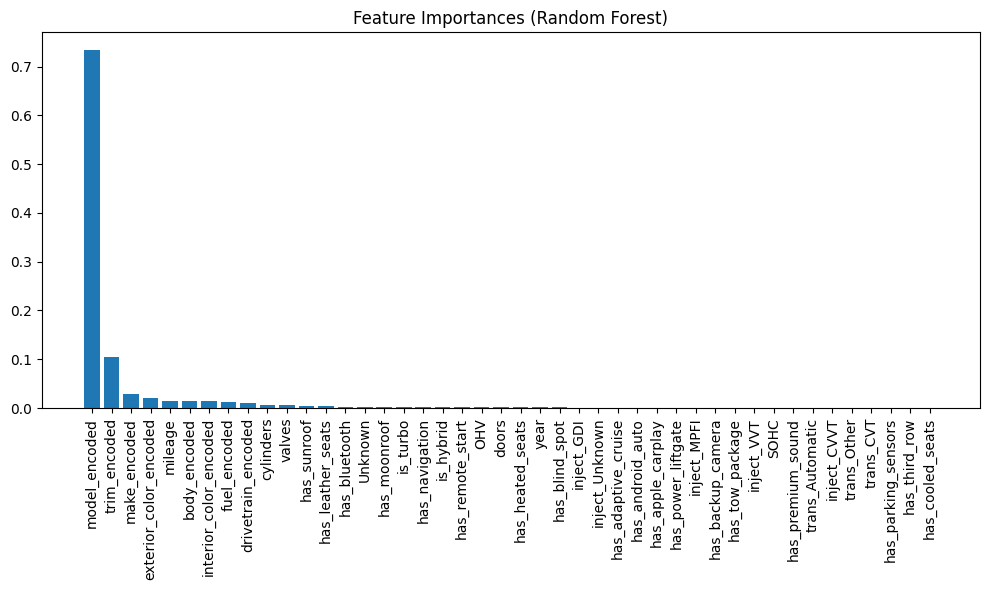

In [137]:
import matplotlib.pyplot as plt

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importances (Random Forest)")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), [X.columns[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


In [138]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=7, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("R² Score (XGBoost):", r2_score(y_test, y_pred_xgb))


R² Score (XGBoost): 0.7426480362059706


In [139]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [4, 6, 8],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

xgb = XGBRegressor(random_state=42)
random_search = RandomizedSearchCV(xgb, param_grid, scoring='r2', n_iter=10, cv=3, verbose=1, n_jobs=-1)
random_search.fit(X_train, y_train)

print("Best R² from tuned XGBoost:", r2_score(y_test, random_search.best_estimator_.predict(X_test)))
print("Best Params:", random_search.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best R² from tuned XGBoost: 0.7729853120261189
Best Params: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


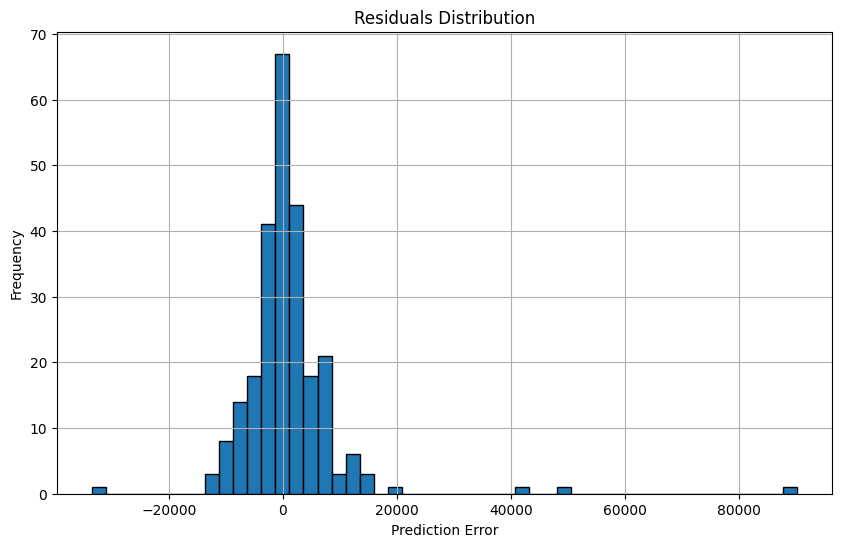

In [140]:
import matplotlib.pyplot as plt

residuals = y_test - random_search.best_estimator_.predict(X_test)

plt.figure(figsize=(10,6))
plt.hist(residuals, bins=50, edgecolor='black')
plt.title("Residuals Distribution")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


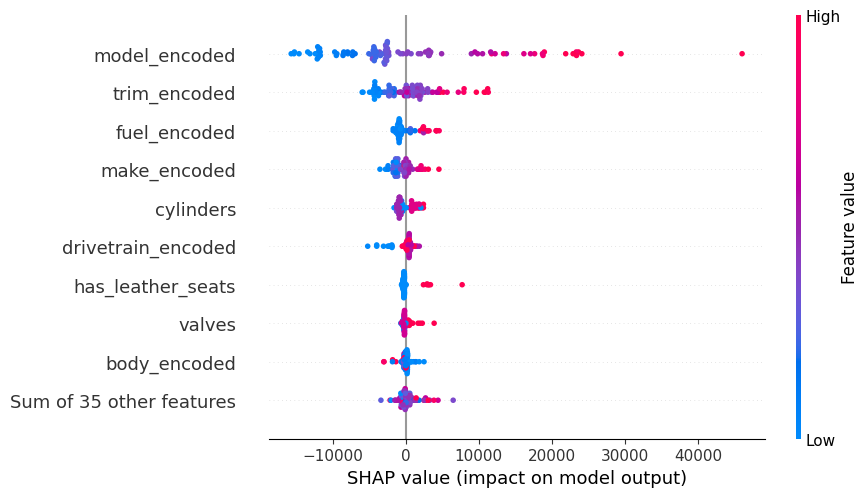

In [141]:
import shap

explainer = shap.Explainer(random_search.best_estimator_)
shap_values = explainer(X_test[:100])  # Do a sample if it's large

shap.plots.beeswarm(shap_values)


<Axes: >

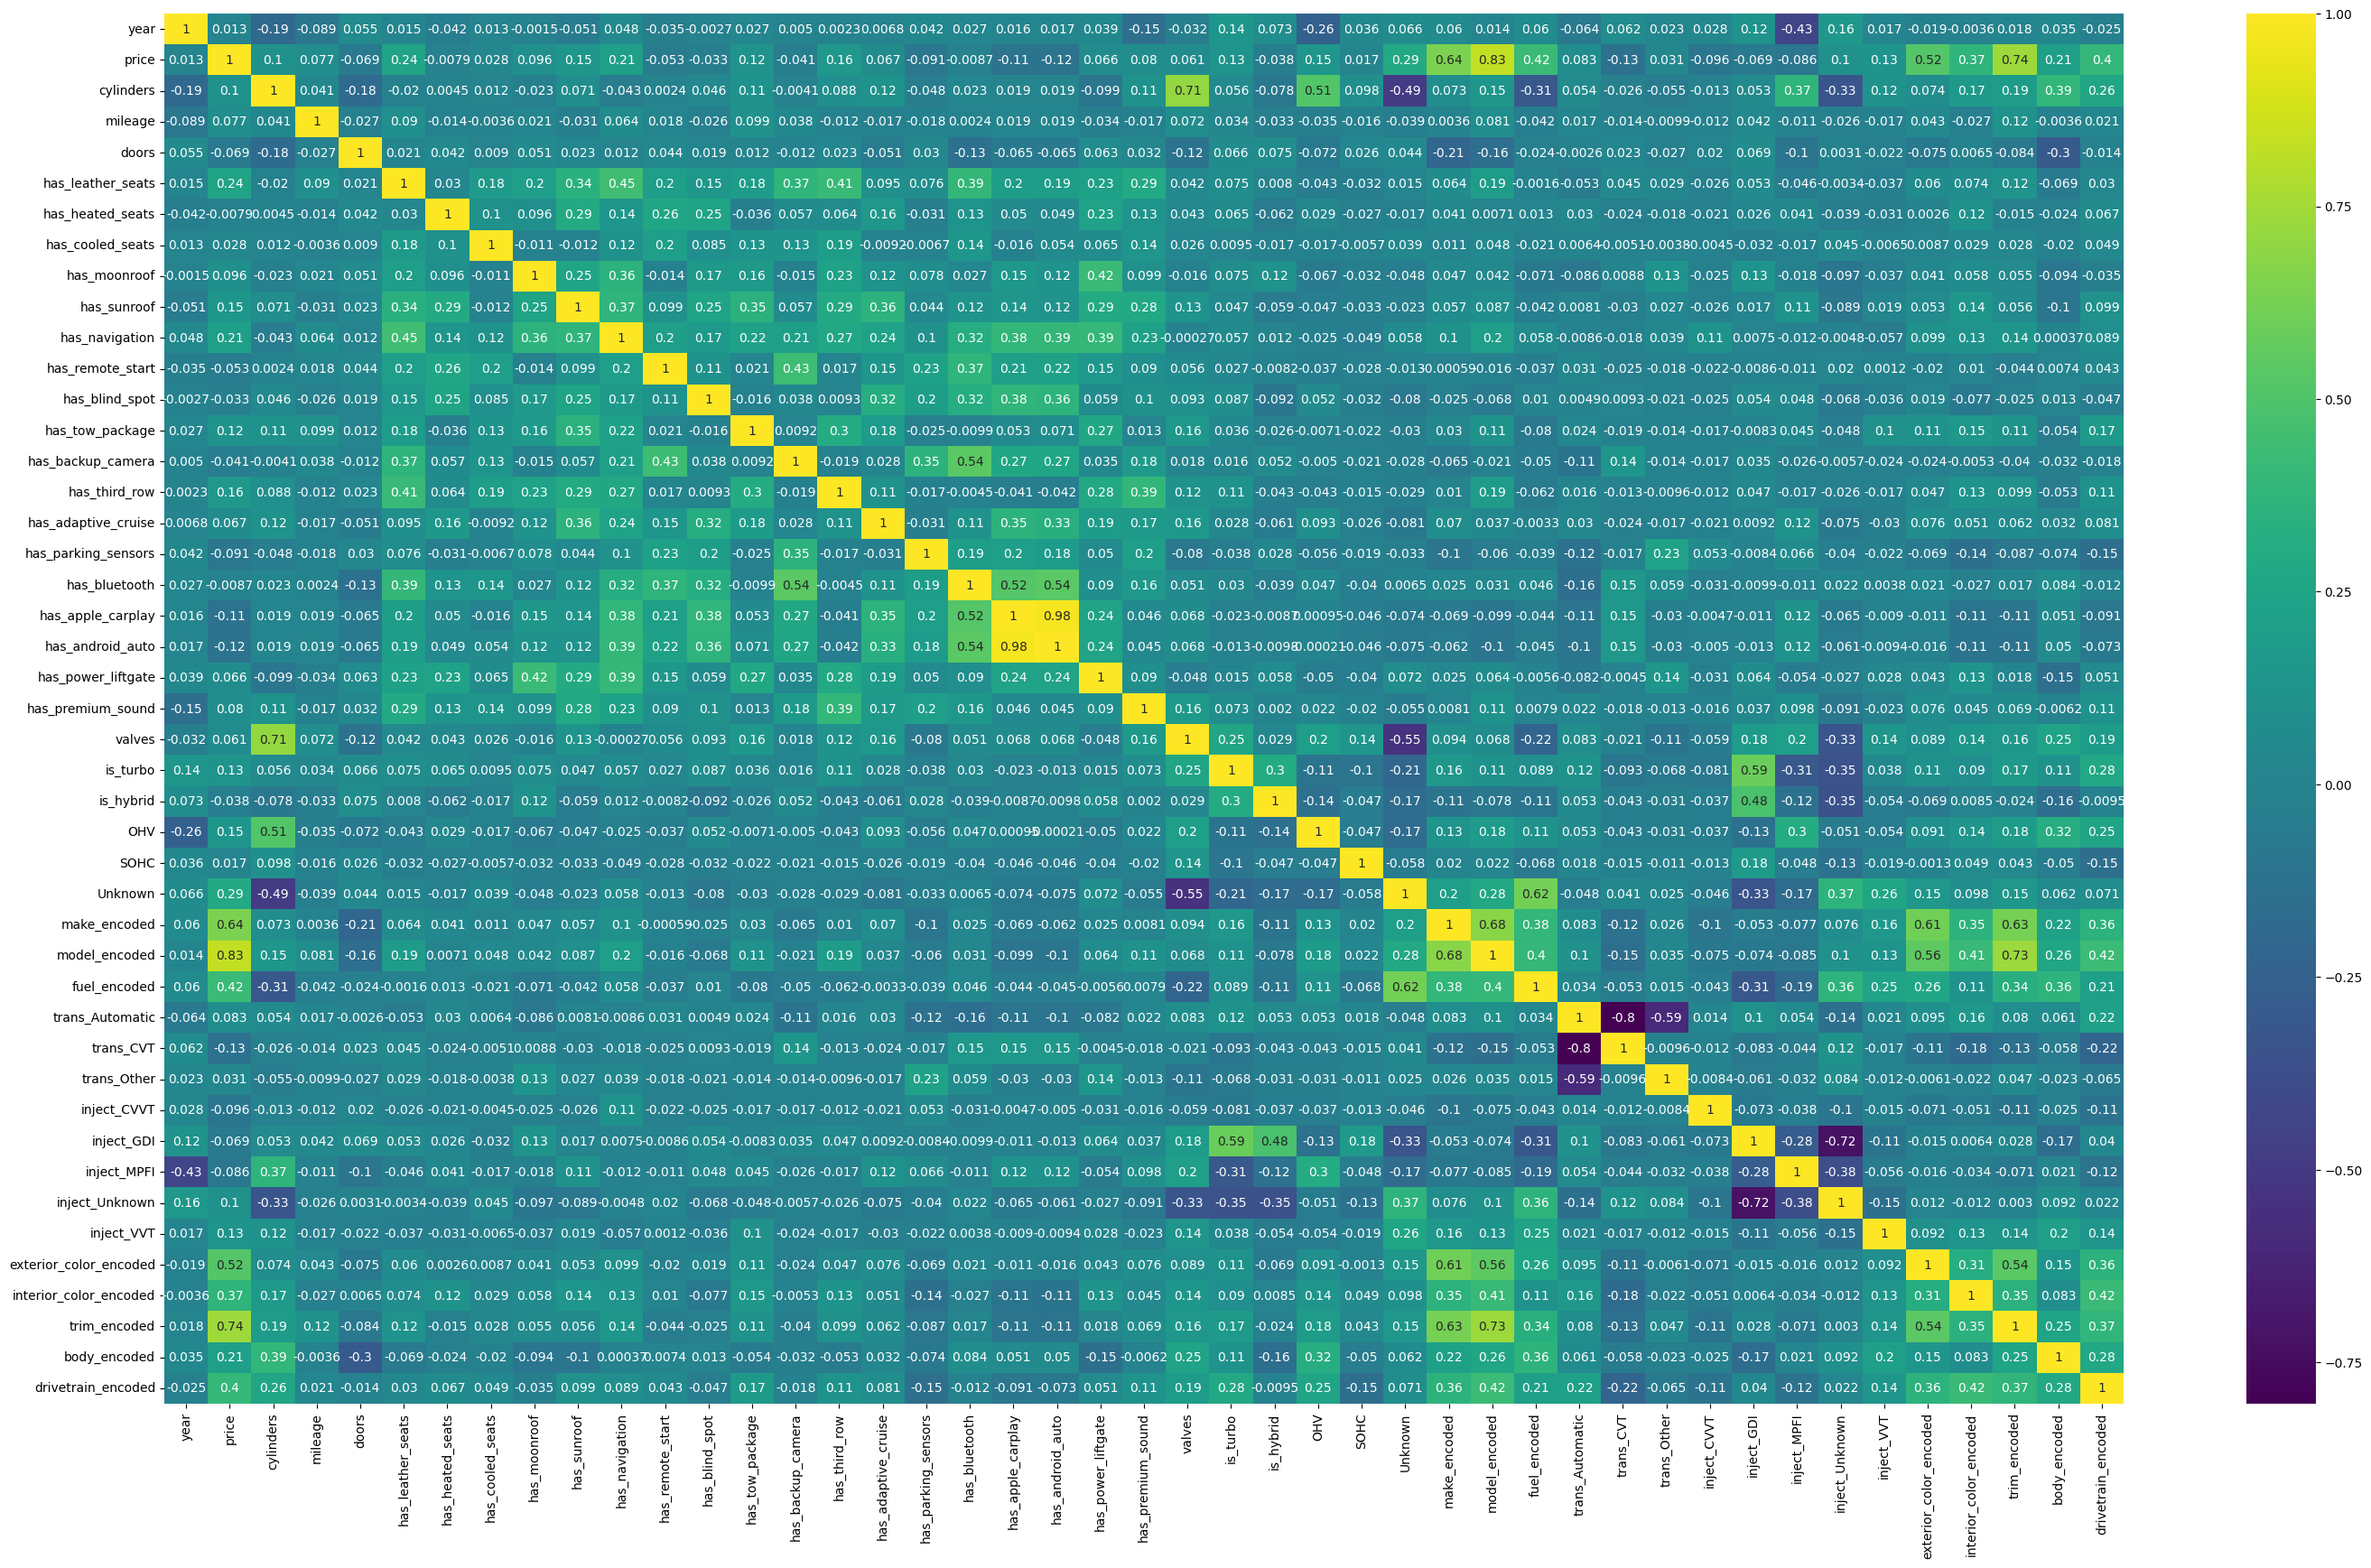

In [142]:
plt.figure(figsize=(35,20))
sns.heatmap(df2.corr(numeric_only=True),annot=True,cmap='viridis')

In [143]:
import joblib
joblib.dump(random_search.best_estimator_, 'xgb_car_price_model.pkl')


['xgb_car_price_model.pkl']